In [28]:
import pandas as pd
pd.set_option('display.max_columns', 200)

df = pd.DataFrame.from_csv("data/processed_data.csv")
val_df = pd.DataFrame.from_csv("data/validation_data.csv")
y_train = df.pop("label")
y_val = val_df.pop("label")

# Complete df columns
for c in val_df.columns:
    if c not in df.columns:
        df[c] = 0
for c in df.columns:
    if c not in val_df.columns:
        val_df[c] = 0
        
# Drop string columns and fill NaNs
df.drop('readme', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('repository', axis=1, inplace=True)
df.drop('owner', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.fillna(0, inplace=True)

val_df.drop('readme', axis=1, inplace=True)
val_df.drop('description', axis=1, inplace=True)
val_df.drop('repository', axis=1, inplace=True)
val_df.drop('owner', axis=1, inplace=True)
val_df.drop('name', axis=1, inplace=True)
val_df.fillna(0, inplace=True)

In [29]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(y_train) 
labels_train = le.transform(y_train)
labels_valid = le.transform(y_val)

In [30]:
# Train classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = XGBClassifier()
clf.fit(df.values, y_train)
y_valid_pred = clf.predict(val_df.values)

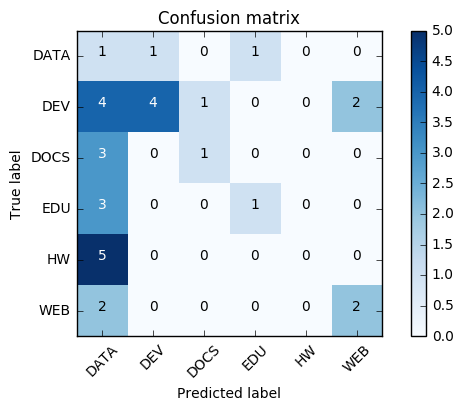

Accuracy: 0.290322580645


In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_val, y_valid_pred)
plot_confusion_matrix(cm, le.classes_)
plt.show()
print "Accuracy: " + str(accuracy_score(y_val, y_valid_pred))

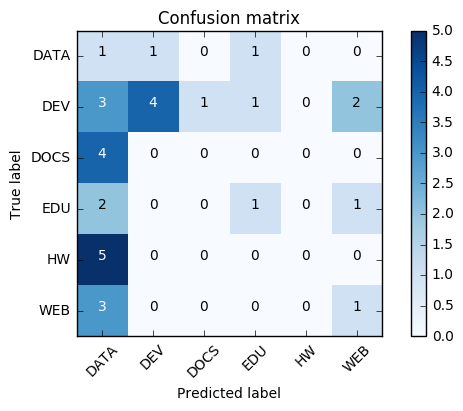

Accuracy: 0.225806451613


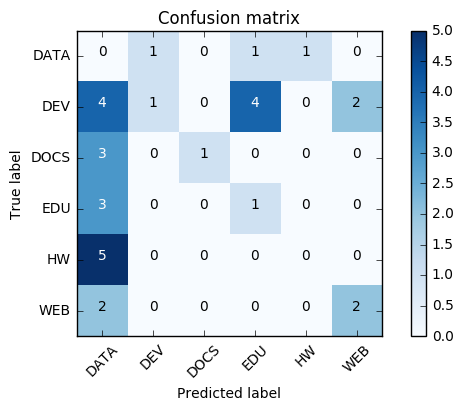

Accuracy: 0.161290322581


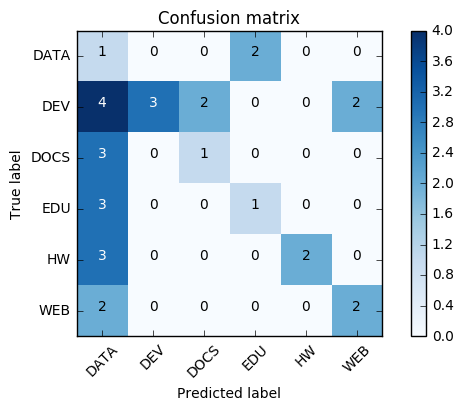

Accuracy: 0.322580645161


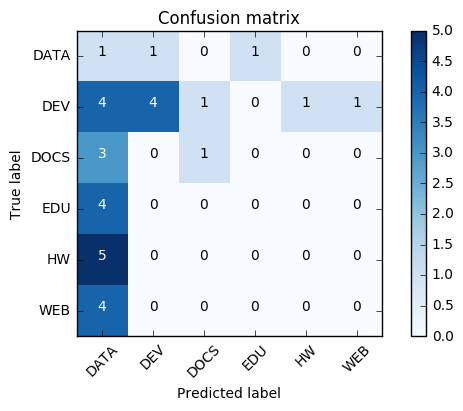

Accuracy: 0.193548387097


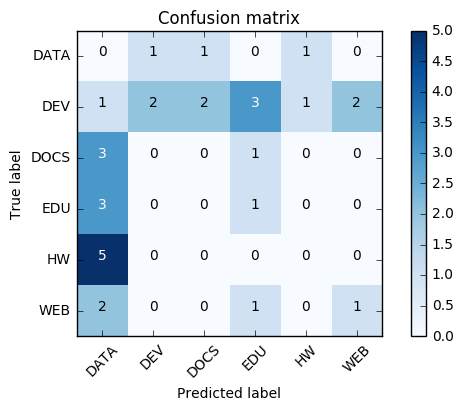

Accuracy: 0.129032258065


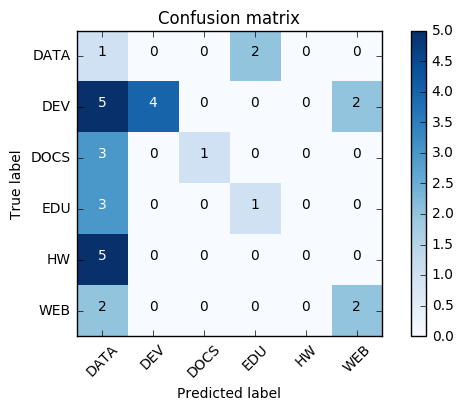

Accuracy: 0.290322580645


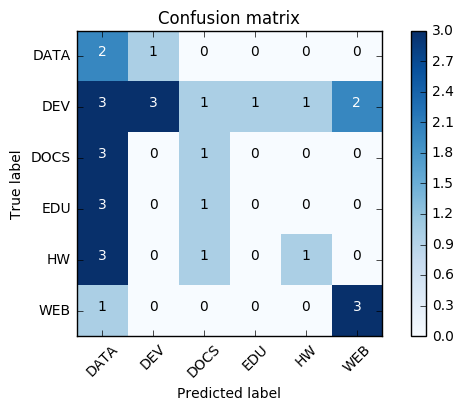

Accuracy: 0.322580645161


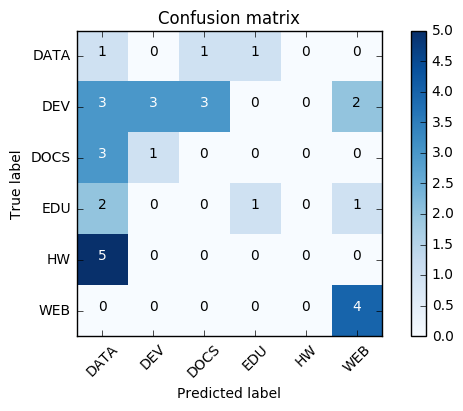

Accuracy: 0.290322580645


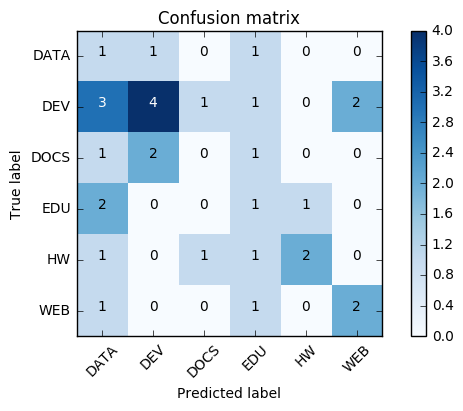

Accuracy: 0.322580645161


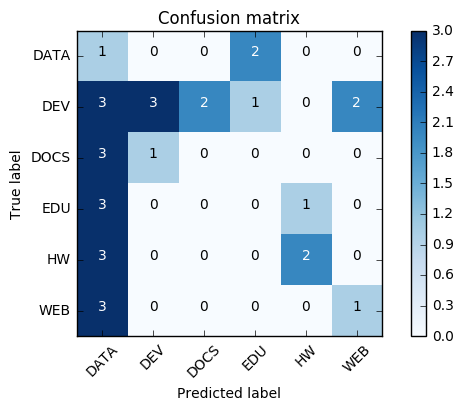

Accuracy: 0.225806451613


In [34]:
# Train the classifier on stratified, shuffled splits (preserving the percentage of samples for each class)
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(labels_train, 10, test_size=0.3, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = df.values[train_index], df.values[test_index]
    y_train_i, y_test = y_train[train_index], y_train[test_index]
    
    clf.fit(X_train, y_train_i)
    y_valid_pred = clf.predict(val_df.values)
    
    cm = confusion_matrix(y_val, y_valid_pred)
    plot_confusion_matrix(cm, le.classes_)
    plt.show()
    print "Accuracy: " + str(accuracy_score(y_val, y_valid_pred))